In [1]:
# Importng all the necessary  librares
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
%matplotlib inline

# Dataset Information
LIMIT_BAL: This feature represents the credit limit assigned to the individual's credit card. It indicates the maximum amount of credit the person can utilize.

SEX: This feature represents the gender of the credit card holder. While gender itself may not directly impact credit card fault detection, it can be considered as a demographic factor that might have some influence on creditworthiness.

EDUCATION: This feature indicates the educational background of the credit card holder. It can provide insights into the person's level of education, which might indirectly correlate with their financial stability and ability to manage credit.

MARRIAGE: This feature represents the marital status of the credit card holder. Similar to gender, marital status can be a demographic factor that could potentially impact credit card fault detection.

AGE: This feature denotes the age of the credit card holder. Age can be an important factor in assessing creditworthiness as it often correlates with financial responsibility and stability.

PAY_0, PAY_2, PAY_3, PAY_4, PAY_5, PAY_6: These features represent the repayment status of the credit card for the past six months. The values indicate the payment status (e.g., -1 represents payment delay for one month, 0 represents payment on time, 1 represents payment delay for two months, and so on). These features are crucial in determining the payment behavior of the individual over time.

BILL_AMT1, BILL_AMT2, BILL_AMT3, BILL_AMT4, BILL_AMT5, BILL_AMT6: These features represent the amount of bill statement for the respective months. They provide information about the outstanding balance on the credit card at specific points in time.

PAY_AMT1, PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6: These features represent the amount of payment made by the credit card holder for the respective months. They indicate the actual payments made to reduce the outstanding balance.

default payment next month: This is the target variable or the dependent variable that indicates whether the credit card holder defaulted on their payment in the following month (1 for default, 0 for no default). This is the variable that the credit card fault detection model aims to predict.

# Some Import tant information about the dataset

This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments(To be continued)

# Data Description 
### Attribute Information: 

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:


 X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
 X2: Gender (1 = male; 2 = female).
 X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
 X4: Marital status (1 = married; 2 = single; 3 = others).
 X5: Age (year).
 X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;

 X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.

 X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
 X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

### Objective
Objective of our project is to predict which customer might default in upcoming months. Before going any fudther let's have a quick look on defination of what actually meant by Credit Card Default.


We are all aware what is credit card. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.

Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.

In [69]:
df=pd.read_csv('Credit_Card.csv')

In [70]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [71]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [72]:
df['isFraud']=df['default.payment.next.month']
df.drop('default.payment.next.month', axis=1, inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [11]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [12]:
df.shape

(30000, 25)

In [13]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [14]:
# Renaming the target value for the better understanding
df['isFraud']=df['default.payment.next.month']
df.drop('default.payment.next.month',axis=1)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,isFraud
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [15]:
# Analyzing number of default
df['isFraud'].value_counts()

0    23364
1     6636
Name: isFraud, dtype: int64

There are many customer  having credicard defaulted

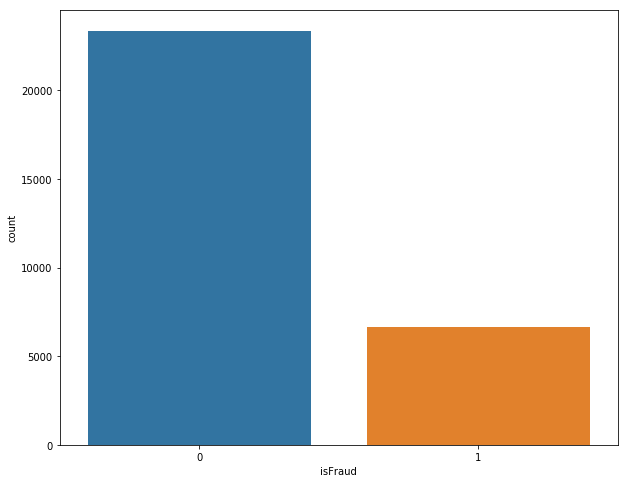

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(x='isFraud',data=df)

As we can see the proportion of both the classes are not same so we conclude that it is a imbalance dataset

In [23]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,isFraud
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0


In [24]:
# Dropping the ID column as its not playing more important role in the dataset
df=df.drop('ID',axis=1)

KeyError: "['ID'] not found in axis"

In [25]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,isFraud
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,3,1,39,0,0,0,0,0,...,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,0
29996,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,0
29997,30000.0,1,2,2,37,4,3,2,-1,0,...,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,1
29998,80000.0,1,3,1,41,1,-1,0,0,0,...,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,1


In [26]:
# SEX: Gender (1=male, 2=female)
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [27]:
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

As per the dataset the EDUCATION column has 6 different lable of education. So as per the information 5,6 and 0 they are not more important so we can simply put them in to the 4 value

In [28]:
other = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[other, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [29]:
# 1 = married; 2 = single; 3 = others
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

As we can see the value of 0 is not determined so we can simply add it on the other

In [30]:
other=df['MARRIAGE']==0
df.loc[other,'MARRIAGE']=3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [31]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,isFraud
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0


In [32]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [33]:
df_cat = df[categorical_features]
df_cat['Defaulter']=df['isFraud']

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [35]:
df['isFraud']=df['isFraud'].astype(int)

In [36]:
df['isFraud'].value_counts()

0    23364
1     6636
Name: isFraud, dtype: int64

In [37]:
df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

<Figure size 720x360 with 0 Axes>

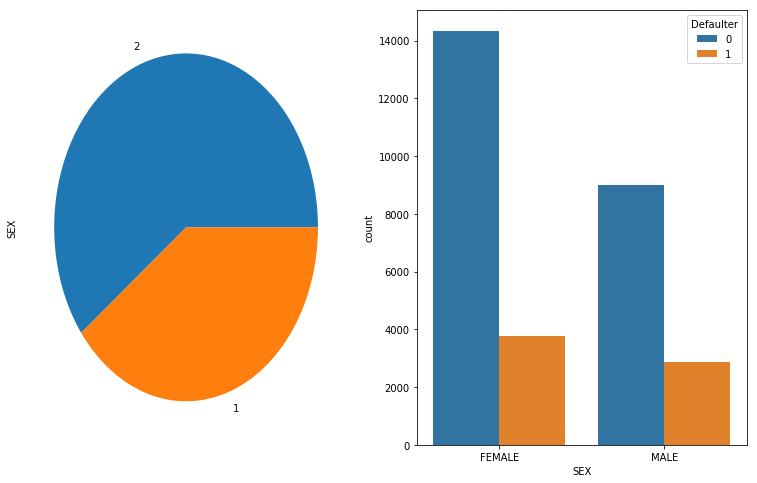

<Figure size 720x360 with 0 Axes>

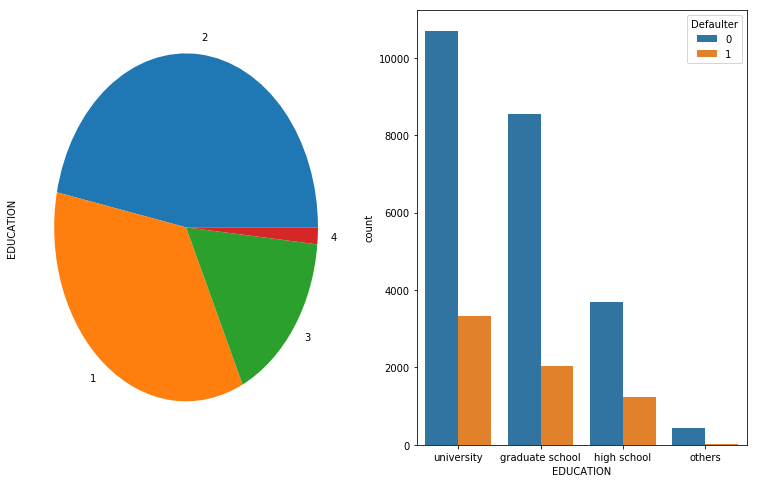

<Figure size 720x360 with 0 Axes>

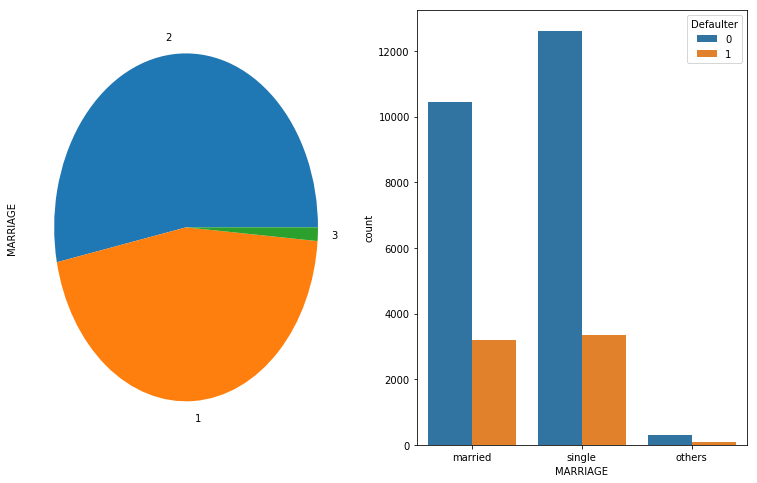

In [38]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cat)

Below are few observations for categorical features:

There are more females credit card holder,so no. of defaulter have high proportion of females.
No. of defaulters have a higher proportion of educated people (graduate school and university)
No. of defaulters have a higher proportion of Singles.

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  int64  
 2   EDUCATION                   30000 non-null  int64  
 3   MARRIAGE                    30000 non-null  int64  
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

In [40]:
# Let's check what is maximum and minimum of the Limit Balance
print("Maximum Limit Balance is ",df['LIMIT_BAL'].max())
print("Maximum Limit Balance is ",df['LIMIT_BAL'].min())


Maximum Limit Balance is  1000000.0
Maximum Limit Balance is  10000.0


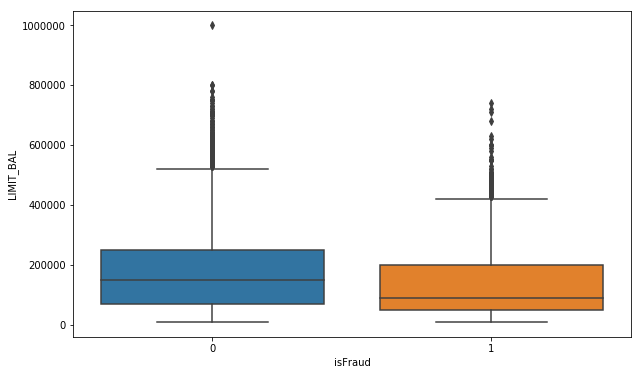

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(x='isFraud',y='LIMIT_BAL',data=df)

As we can see there are many outlier exist in the LIMIT_BAL section. So we have to remove the outlier from itself 

## Renaming the payment and bill column as per the given month name in the dataset so that it will be more easier to understanding

In [30]:
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)

In [31]:
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)

In [32]:
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [33]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,isDefaulter
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0


In [34]:
df['AGE'].value_counts()

AGE
29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: count, dtype: int64

<Axes: xlabel='AGE', ylabel='count'>

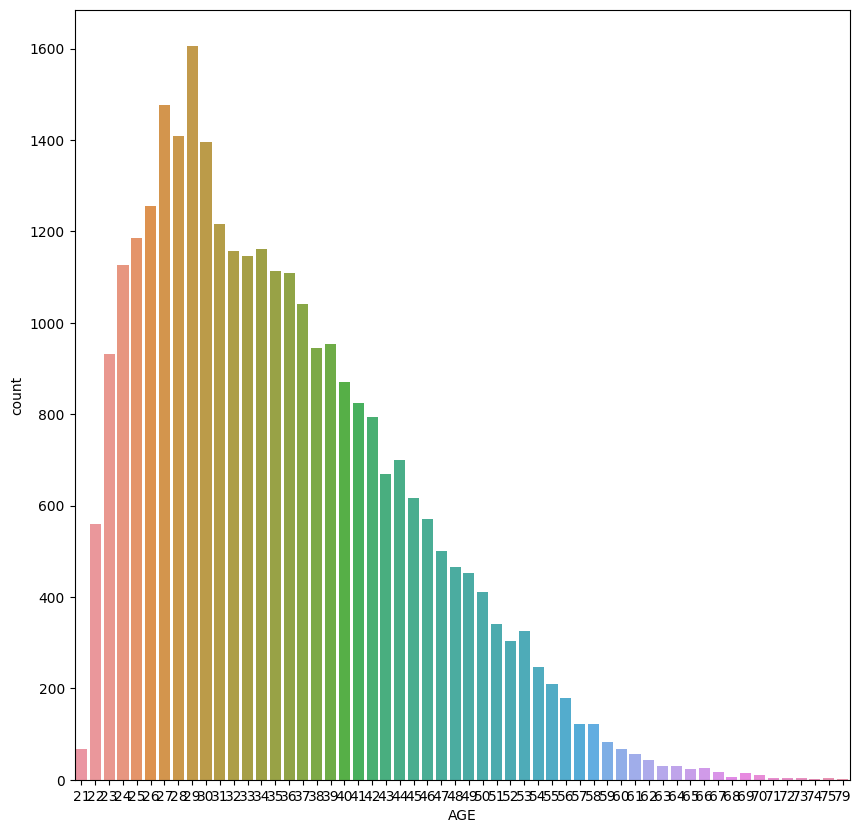

In [35]:
plt.figure(figsize=(10,10))
sns.countplot(x='AGE',data=df)

In [36]:
df.groupby('isFraud')['AGE'].mean()

isDefaulter
0    35.417266
1    35.725738
Name: AGE, dtype: float64

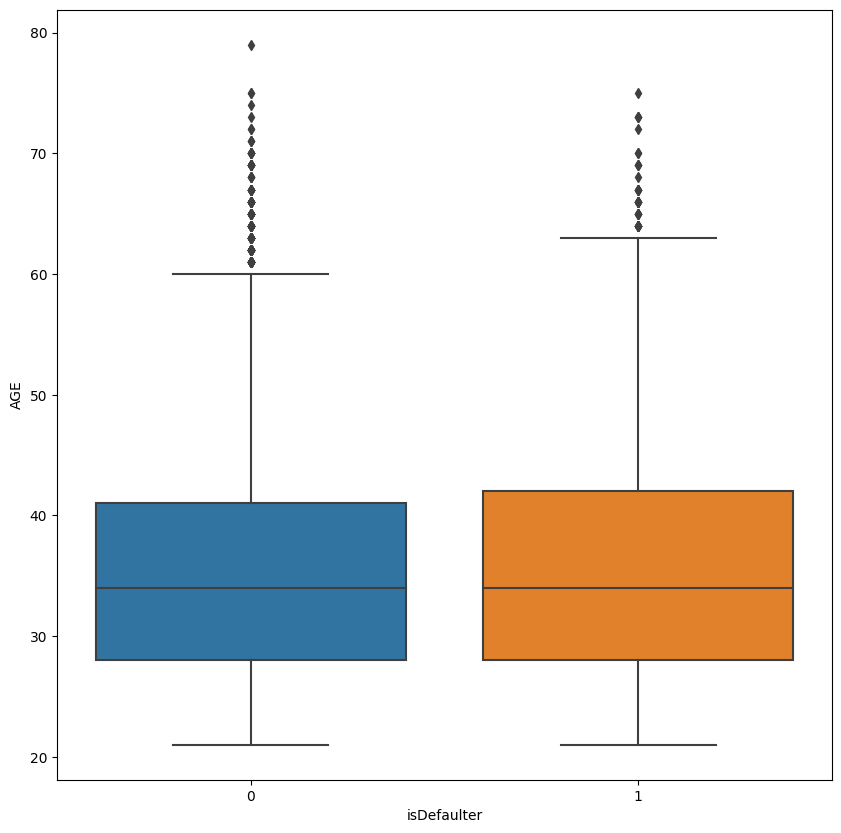

In [37]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="isFraud", y="AGE", data=df)

As we can see there are some outliers present in the  Age column also

## Bill Amount Column

In [38]:
bill_amnt_df = df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

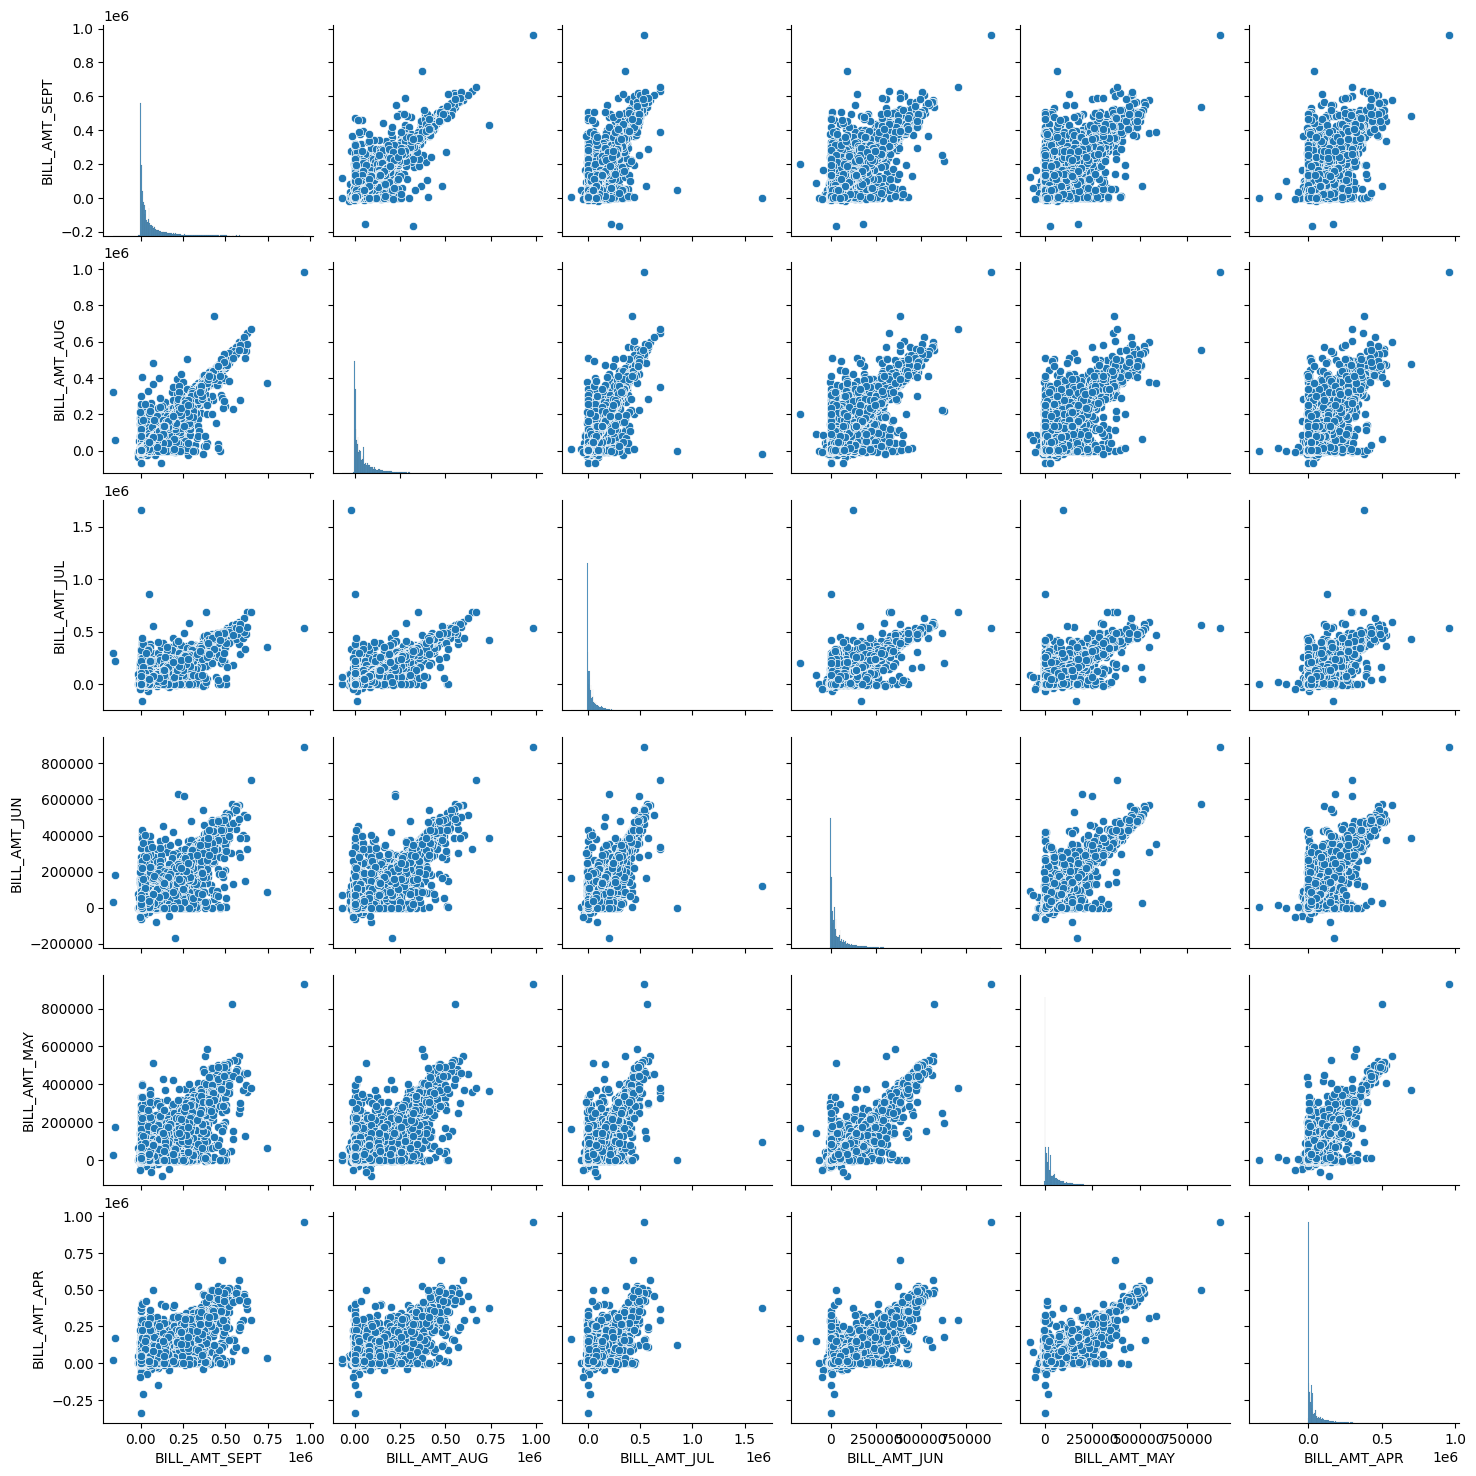

In [39]:
sns.pairplot(data=bill_amnt_df)

## Payment column

In [40]:
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']

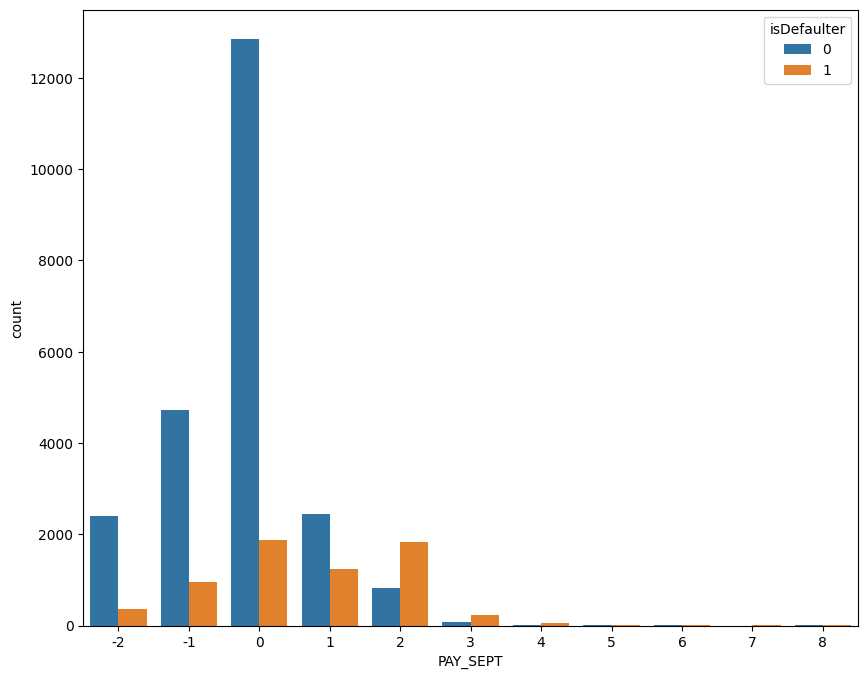

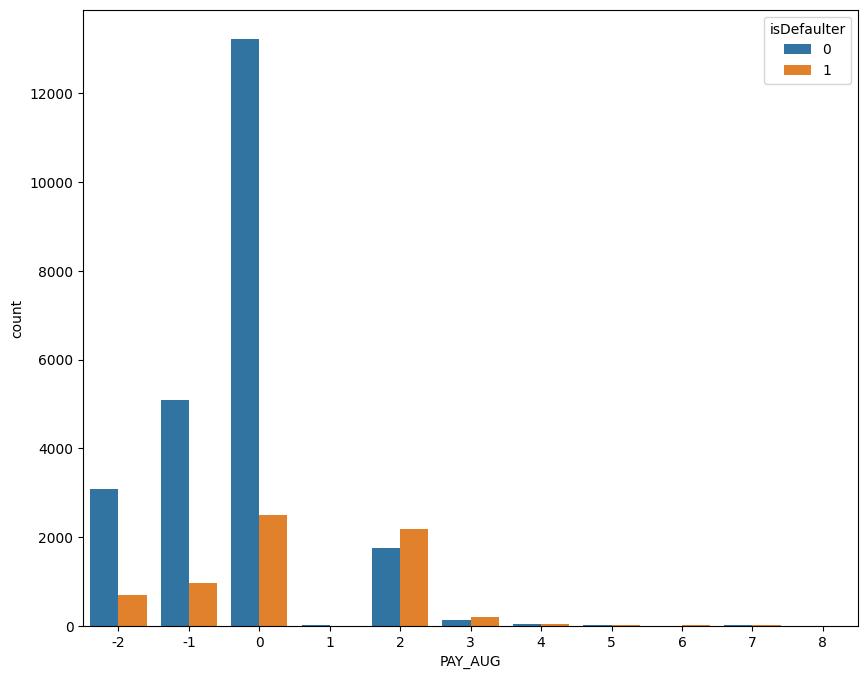

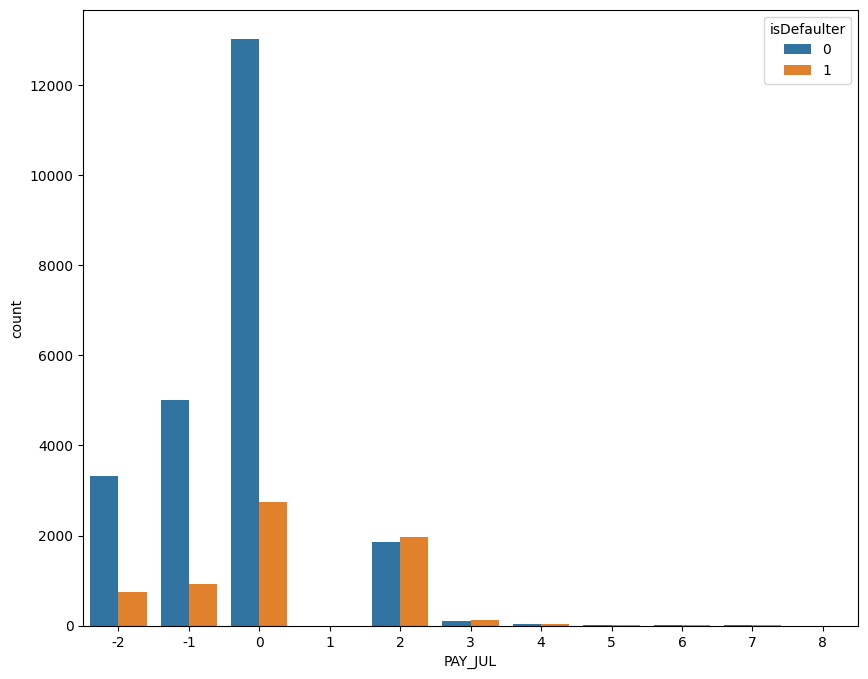

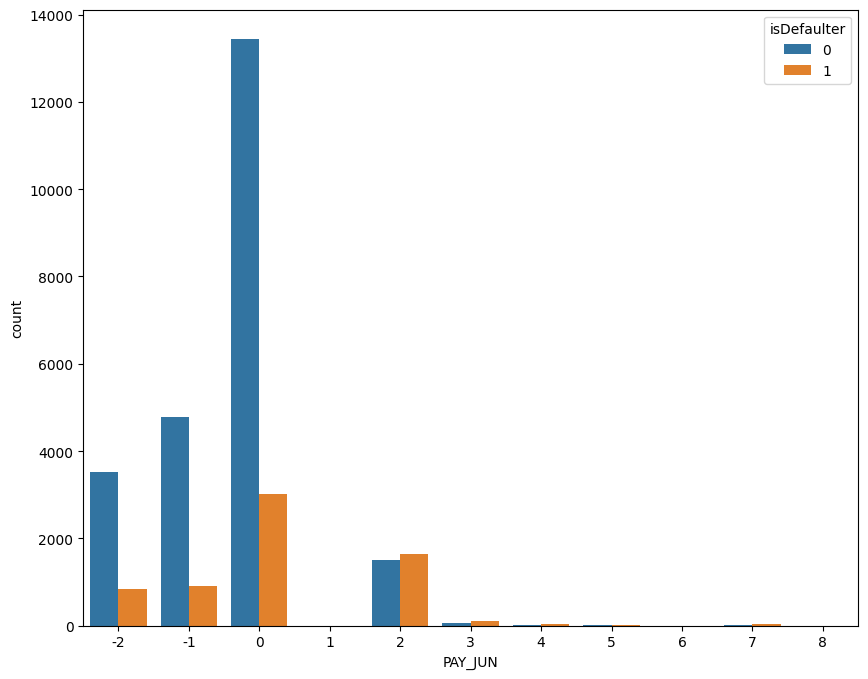

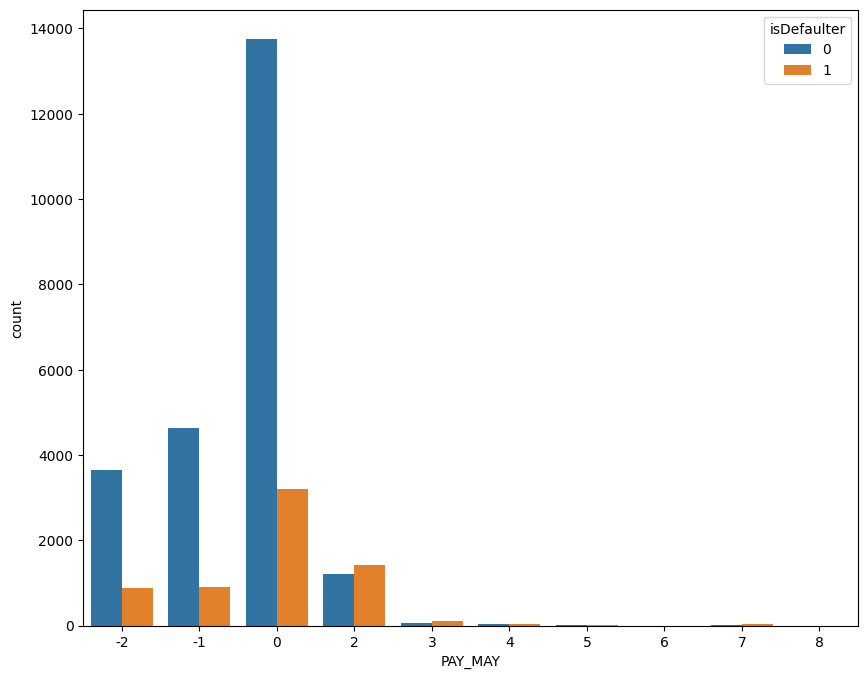

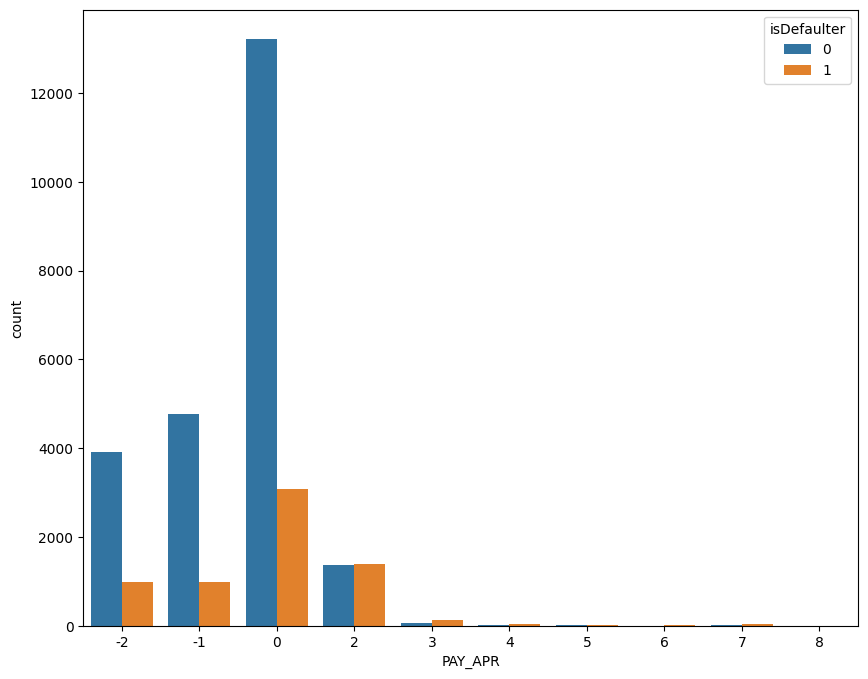

In [41]:
for i in pay_col:
    plt.figure(figsize=(10,8))
    sns.countplot(x=i,hue='isDefaulter',data=df)

## Total Paid Amount

In [42]:
pay_amnt_df = df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'isDefaulter']]

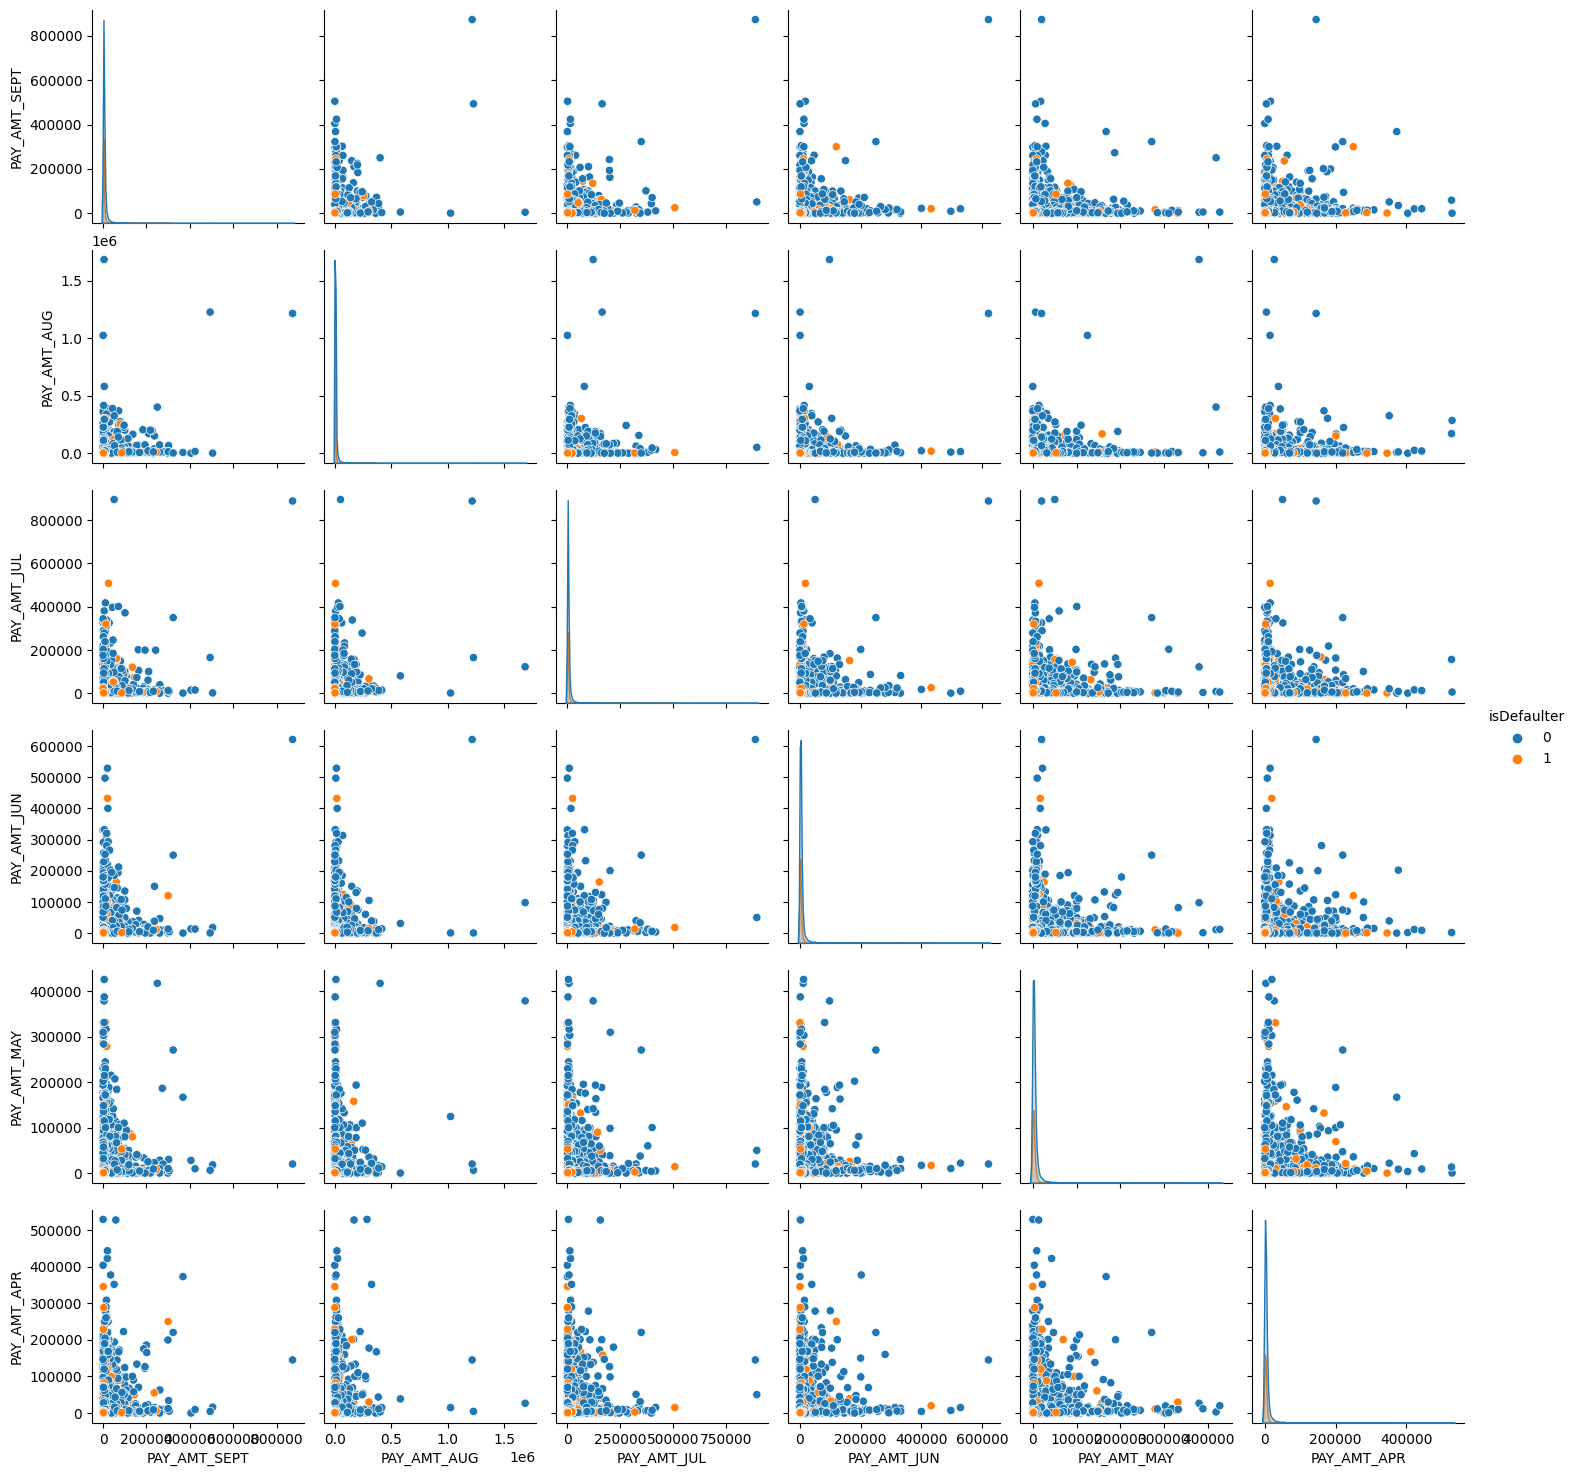

In [43]:
sns.pairplot(data=pay_amnt_df,hue='isDefaulter')

## As prevously we concluded that the dataset is imbalance so first we have to balance the dataset.We can simply use SMOTE(Synthetic Minority Oversamping Technique) to balance the dataset

In [44]:
#Importing the SMOTE
from imblearn.over_sampling import SMOTE

In [45]:
smote=SMOTE()

In [46]:
smote

SMOTE()

In [48]:
# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['isDefaulter'])

In [49]:
print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [50]:
#All the indpendent columns
x_smote

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.000000,0.000000,0.000000,0.000000,689.000000,0.000000,0.000000,0.000000,0.000000,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.000000,3455.000000,3261.000000,0.000000,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.000000,14948.000000,15549.000000,1518.000000,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.000000,28959.000000,29547.000000,2000.000000,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.000000,19146.000000,19131.000000,2000.000000,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,20000.0,1,2,2,36,0,0,0,0,0,...,20073.653864,19513.021862,19831.591893,1314.326613,1441.002765,1180.303687,1000.000000,1938.773340,963.264004,1
46724,100000.0,2,1,1,27,1,0,0,0,0,...,82393.485053,76123.476425,76931.966478,3766.002194,5318.124174,1635.598405,2748.950107,2864.274615,2850.825426,1
46725,300000.0,1,1,1,49,-1,-1,-1,-1,-1,...,4361.570196,3952.226759,1351.083177,853.861352,3982.710546,4373.908855,3972.277080,1354.939008,10634.009811,1
46726,30000.0,1,2,1,26,0,0,2,1,1,...,24781.372594,25449.804293,25785.099693,3210.552127,901.705634,986.140494,1197.999483,901.705634,1099.213645,1


In [51]:
#Dependent Column or target Column
y_smote

0        1
1        1
2        0
3        0
4        0
        ..
46723    1
46724    1
46725    1
46726    1
46727    1
Name: isDefaulter, Length: 46728, dtype: int32

In [52]:
columns = list(df.columns)

In [53]:
# Removing the 'isDefualter' column from the imbalance Dataset
columns.pop()

'isDefaulter'

In [55]:
# Creating the Balance dataset
balance_df=pd.DataFrame(x_smote,columns=columns)
balance_df['isDefaulter']=y_smote

In [57]:
balance_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,isDefaulter
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0


<Axes: xlabel='isDefaulter', ylabel='count'>

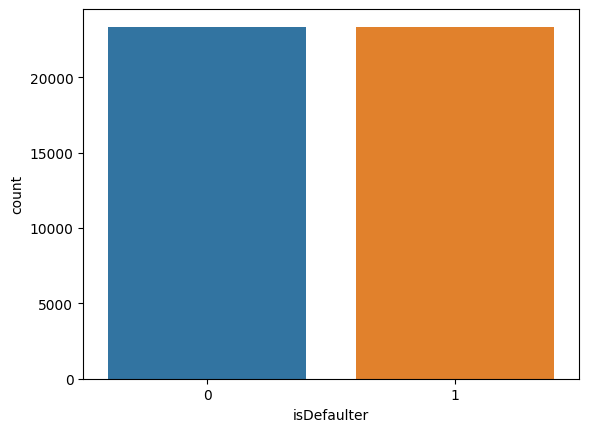

In [58]:
sns.countplot(x='isDefaulter',data=balance_df)

In [59]:
balance_df['isDefaulter'].value_counts()

isDefaulter
1    23364
0    23364
Name: count, dtype: int64

## After applying the SMOTE technique the dataset is now Balance

In [62]:
balance_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,isDefaulter
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0


# Feature Engineering

In [66]:
df_copy=balance_df.copy()

In [75]:
# For the total payment we crete an "Payment_value" column 
df_copy['Payment_Value'] = df_copy['PAY_SEPT'] + df_copy['PAY_AUG'] + df_copy['PAY_JUL'] + df_copy['PAY_JUN'] + df_copy['PAY_MAY'] + df_copy['PAY_APR']

In [76]:
df_copy.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,isDefaulter,Payement_Value,Dues,Payment_Value
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,1,1,-2,3913.0,-2
1,120000.0,2,2,2,26,-1,2,0,0,0,...,1000.0,1000.0,1000.0,0.0,2000.0,1,1,3,10352.0,3
2,90000.0,2,2,2,34,0,0,0,0,0,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0,76608.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0,174713.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,36681.0,10000.0,9000.0,689.0,679.0,0,0,-2,44620.0,-2


In [77]:
df_copy.groupby('isDefaulter')['Payment_Value'].mean()

isDefaulter
0   -1.980140
1    1.589796
Name: Payment_Value, dtype: float64

In [78]:
df_copy['Dues'] = (df_copy['BILL_AMT_APR']+df_copy['BILL_AMT_MAY']+df_copy['BILL_AMT_JUN']+df_copy['BILL_AMT_JUL']+df_copy['BILL_AMT_SEPT'])-(df_copy['PAY_AMT_APR']+df_copy['PAY_AMT_MAY']+df_copy['PAY_AMT_JUN']+df_copy['PAY_AMT_JUL']+df_copy['PAY_AMT_AUG']+df_copy['PAY_AMT_SEPT'])

In [79]:
df_copy.groupby('isDefaulter')['Dues'].mean()

isDefaulter
0    187742.051532
1    193648.374478
Name: Dues, dtype: float64

In [82]:
df_copy

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,isDefaulter,Payement_Value,Dues,Payment_Value
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.000000,0.000000,0.000000,0.000000,0.000000,1,1,-2,3913.000000,-2
1,120000.0,2,2,2,26,-1,2,0,0,0,...,1000.000000,1000.000000,1000.000000,0.000000,2000.000000,1,1,3,10352.000000,3
2,90000.0,2,2,2,34,0,0,0,0,0,...,1500.000000,1000.000000,1000.000000,1000.000000,5000.000000,0,0,0,76608.000000,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,2019.000000,1200.000000,1100.000000,1069.000000,1000.000000,0,0,0,174713.000000,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,36681.000000,10000.000000,9000.000000,689.000000,679.000000,0,0,-2,44620.000000,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,20000.0,1,2,2,36,0,0,0,0,0,...,1441.002765,1180.303687,1000.000000,1938.773340,963.264004,1,1,0,91088.248948,0
46724,100000.0,2,1,1,27,1,0,0,0,0,...,5318.124174,1635.598405,2748.950107,2864.274615,2850.825426,1,1,1,396248.903167,1
46725,300000.0,1,1,1,49,-1,-1,-1,-1,-1,...,3982.710546,4373.908855,3972.277080,1354.939008,10634.009811,1,1,-7,-10593.624120,-7
46726,30000.0,1,2,1,26,0,0,2,1,1,...,901.705634,986.140494,1197.999483,901.705634,1099.213645,1,1,6,113895.142258,6


In [89]:
df_copy.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,...,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month,isDefaulter,Payement_Value,Dues,Payment_Value
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,689.0,0.0,0.0,0.0,0.0,1,1,-2,3913.0,-2
1,120000.0,2,2,2,26,-1,2,0,0,0,...,1000.0,1000.0,1000.0,0.0,2000.0,1,1,3,10352.0,3
2,90000.0,2,2,2,34,0,0,0,0,0,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,0,76608.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,0,174713.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,36681.0,10000.0,9000.0,689.0,679.0,0,0,-2,44620.0,-2
